In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
# Only consider the top 20k words
max_features  = 20000  
embedding_dim = 128
maxlen = 500

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


25000 Training sequences
25000 Validation sequences


In [3]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(maxlen,), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)

# Add 2 SimpleRNN
x = layers.SimpleRNN(64, return_sequences=True)(x)
x = layers.SimpleRNN(64)(x)

# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 64)           12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2,580,673
Trainable params: 2,580,673
Non-trainable params: 0
_________________________________________________________________


2022-12-21 10:23:14.985383: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 10:23:15.002488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 10:23:15.002562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 10:23:15.002885: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
 1/49 [..............................] - ETA: 52s - loss: 0.7121 - accuracy: 0.4961

2022-12-21 10:23:16.648362: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


49/49 [==============================] - 12s 218ms/step - loss: 0.6493 - accuracy: 0.6122 - val_loss: 0.5152 - val_accuracy: 0.7456
Epoch 2/50
49/49 [==============================] - 11s 216ms/step - loss: 0.3087 - accuracy: 0.8699 - val_loss: 0.3878 - val_accuracy: 0.8318
Epoch 3/50
49/49 [==============================] - 11s 215ms/step - loss: 0.1067 - accuracy: 0.9634 - val_loss: 0.4885 - val_accuracy: 0.8071
Epoch 4/50
49/49 [==============================] - 10s 214ms/step - loss: 0.0211 - accuracy: 0.9952 - val_loss: 0.5224 - val_accuracy: 0.8460
Epoch 5/50
49/49 [==============================] - 11s 216ms/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 0.6000 - val_accuracy: 0.8469
Epoch 6/50
49/49 [==============================] - 11s 221ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.6403 - val_accuracy: 0.8407
Epoch 7/50
49/49 [==============================] - 11s 218ms/step - loss: 7.5252e-04 - accuracy: 1.0000 - val_loss: 0.6697 - val_accuracy: 0.8472
Epoch 

<Figure size 1000x1000 with 0 Axes>

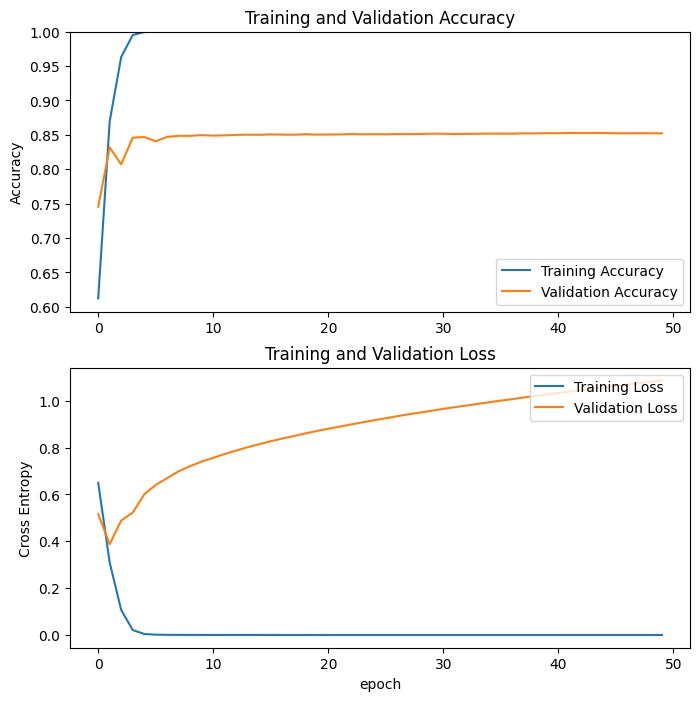

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()